#### **ANALYZING POLISH BABY NAME TRENDS**

In this project I'll use data published by dane.gov.pl containing names given to Polish children from 2000 to 2021.

In [194]:
# Data is split into 5 datasets:
# "2000_2019": male and female names given to childen from 2000 to 2019
# "2020_M": male names given in 2020
# "2021_M": male names given in 2021
# "2020_F": female names given in 2020
# "2021_F": female names given in 2021

# urls to datasets are contained in 'urls' dictionary
urls = {
    "2000_2019": "https://api.dane.gov.pl/resources/21458,imiona-nadane-dzieciom-w-polsce-w-latach-2000-2019-imie-pierwsze/csv", 
    "2020_M": "https://api.dane.gov.pl/resources/28020,imiona-meskie-nadane-dzieciom-w-polsce-w-2020-r-imie-pierwsze/csv",
    "2021_M": "https://api.dane.gov.pl/resources/36393,imiona-meskie-nadane-dzieciom-w-polsce-w-2021-r-imie-pierwsze/csv",
    "2020_F": "https://api.dane.gov.pl/resources/28021,imiona-zenskie-nadane-dzieciom-w-polsce-w-2020-r-imie-pierwsze/csv",
    "2021_F": "https://api.dane.gov.pl/resources/36394,imiona-zenskie-nadane-dzieciom-w-polsce-w-2021-r-imie-pierwsze/csv"
    }

In [195]:
# Importing packages
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### **DATA IMPORTING AND CLEANING**

Final goal is to create one dataframe contaning all datasets.
Firstly, all datasets have to be imported and put into dataframes. Each dataset's structure has to be examined and prepared for concatenation with others.


In [196]:
# Create empty dictionary for dataframes
dataframes = {}

# Iterate through urls dictonary, pass each url to pandas.read_csv in order to create dataframes
# Add created dataframes to "dataframes" dictionary
for key, url in urls.items():
    dataframes[key] = pd.read_csv(url)

# Iterate through dataframes dict and examine their contents
for df in dataframes.values():
    df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24461 entries, 0 to 24460
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rok     24461 non-null  int64 
 1   Imię    24461 non-null  object
 2   Liczba  24461 non-null  int64 
 3   Płeć    24461 non-null  object
dtypes: int64(2), object(2)
memory usage: 764.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IMIĘ_PIERWSZE     799 non-null    object
 1   PŁEĆ              799 non-null    object
 2   LICZBA_WYSTĄPIEŃ  799 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IMIĘ_PIERWSZE     860 non-null    obje

* We can see that all 5 datasets contain following columns: 'name(imię)', 'sex(płeć)' and 'number_of_occurences(liczba_wystąpień)'.

* Only the first dataset contains 'year(rok)' column. Column 'year' has to be added to 4 other datasets.

* Column names and order of columns differ between first and other datasets. It has to be unified before concatenation.

* There are no null values.


In [197]:
# Iterate through dataframes dict and check if each df contains "year" ("Rok") column
# If not, add 'year' column. Year value is extracted from dictionary keys using regex and then change to an integer
for key, df in dataframes.items():
    if 'Rok' not in df.columns:
        year = re.findall(r'\d+', key)
        year_int = int(year[0])
        df['year'] = year_int

# Use .info() method to see if 'year' column has been successfully added
for df in dataframes.values():
    print(df.head())

    Rok     Imię  Liczba Płeć
0  2000    JAKUB   14497    M
1  2000  MATEUSZ   11454    M
2  2000   KACPER    8898    M
3  2000   MICHAŁ    8498    M
4  2000   PATRYK    7743    M
  IMIĘ_PIERWSZE       PŁEĆ  LICZBA_WYSTĄPIEŃ  year
0        ANTONI  MĘŻCZYZNA              8368  2020
1           JAN  MĘŻCZYZNA              7658  2020
2    ALEKSANDER  MĘŻCZYZNA              7165  2020
3         JAKUB  MĘŻCZYZNA              7162  2020
4    FRANCISZEK  MĘŻCZYZNA              7124  2020
  IMIĘ_PIERWSZE       PŁEĆ  LICZBA_WYSTĄPIEŃ  year
0        ANTONI  MĘŻCZYZNA              7821  2021
1           JAN  MĘŻCZYZNA              6975  2021
2    ALEKSANDER  MĘŻCZYZNA              6919  2021
3    FRANCISZEK  MĘŻCZYZNA              6629  2021
4         JAKUB  MĘŻCZYZNA              6427  2021
  IMIĘ_PIERWSZE     PŁEĆ  LICZBA_WYSTĄPIEŃ  year
0       ZUZANNA  KOBIETA              7351  2020
1         JULIA  KOBIETA              7351  2020
2         ZOFIA  KOBIETA              7073  2020
3         HA

We can see that now all 5 dataframes contain a 'year' column.
Before concatenating them into one dataframe there's still need to:
* Rename all columns to English
* Put columns in all dfs in the same order

In [198]:
# Create a dictionary for column renaming. Key = old name, value = new name
rename_dict = {'Rok': 'year', 'IMIĘ_PIERWSZE': 'name', 'Imię': 'name', 'PŁEĆ': 'sex', 'Płeć': 'sex', 'LICZBA_WYSTĄPIEŃ': 'num', 'Liczba': 'num'}

# Rename columns
for df in dataframes.values():
    df.rename(columns = rename_dict, inplace = True)
    
# Reorder columns in all dataframe. The final order should be: 'year', 'sex', 'name', 'num' 
# .head() is used to examine the result
for df in dataframes.values():
    df = df[['year', 'sex', 'name', 'num']]
    print(df.head())

   year sex     name    num
0  2000   M    JAKUB  14497
1  2000   M  MATEUSZ  11454
2  2000   M   KACPER   8898
3  2000   M   MICHAŁ   8498
4  2000   M   PATRYK   7743
   year        sex        name   num
0  2020  MĘŻCZYZNA      ANTONI  8368
1  2020  MĘŻCZYZNA         JAN  7658
2  2020  MĘŻCZYZNA  ALEKSANDER  7165
3  2020  MĘŻCZYZNA       JAKUB  7162
4  2020  MĘŻCZYZNA  FRANCISZEK  7124
   year        sex        name   num
0  2021  MĘŻCZYZNA      ANTONI  7821
1  2021  MĘŻCZYZNA         JAN  6975
2  2021  MĘŻCZYZNA  ALEKSANDER  6919
3  2021  MĘŻCZYZNA  FRANCISZEK  6629
4  2021  MĘŻCZYZNA       JAKUB  6427
   year      sex     name   num
0  2020  KOBIETA  ZUZANNA  7351
1  2020  KOBIETA    JULIA  7351
2  2020  KOBIETA    ZOFIA  7073
3  2020  KOBIETA    HANNA  6658
4  2020  KOBIETA     MAJA  6508
   year      sex     name   num
0  2021  KOBIETA  ZUZANNA  6562
1  2021  KOBIETA    ZOFIA  6325
2  2021  KOBIETA    HANNA  6065
3  2021  KOBIETA    JULIA  5954
4  2021  KOBIETA     MAJA  5585


Now, that all dfs have the same columns and order, it's time to concatenate them into one dataframe: 'names_2000_2021'

In [199]:
# Concatenate all dfs into one df: 'names_2000_2021' then use .info() to examine new df
names_2000_2021 = pd.concat(dataframes.values(), ignore_index = True)
names_2000_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27741 entries, 0 to 27740
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    27741 non-null  int64 
 1   name    27741 non-null  object
 2   num     27741 non-null  int64 
 3   sex     27741 non-null  object
dtypes: int64(2), object(2)
memory usage: 867.0+ KB


In [200]:
# Values of the 'name' column are in UPPERCASE. Let's Capitalize them.
names_2000_2021['name'] = names_2000_2021['name'].str.capitalize()
names_2000_2021.head()

,year,name,num,sex
0,2000,Jakub,14497,M
1,2000,Mateusz,11454,M
2,2000,Kacper,8898,M
3,2000,Michał,8498,M
4,2000,Patryk,7743,M


In [201]:
# Now as we finally have one dataframe contaning all data
# How many unique value are in the 'sex' column?
names_2000_2021['sex'].value_counts()

K            12352
M            12109
MĘŻCZYZNA     1659
KOBIETA       1621
Name: sex, dtype: int64

We can see that the 'sex' column contains 4 different values. There should be only 2: "M" for males and "F" for females

In [202]:
# Change 'MĘŻCZYZNA' to 'M'
names_2000_2021.loc[names_2000_2021['sex'] == 'MĘŻCZYZNA', 'sex'] = 'M'

# Change all remaining values, besides 'M', to 'F'
names_2000_2021.loc[names_2000_2021['sex'] != 'M', 'sex'] = 'F'

# How many unique values are in the 'sex' column now?
names_2000_2021['sex'].value_counts()

F    13973
M    13768
Name: sex, dtype: int64

In [210]:
# Sort values by year ascending and then num descending
names_2000_2021.sort_values(by = ['year', 'num'], ascending = [True, False], inplace = True)

#### **EXPLORATORY DATA ANALYSIS**
Now, that the dataset has finally been cleaned, let's look at the values that it contains.

Our dataset contains data for 22 year period (2000-2021). Rare names surely appear only in some years.
How many names appear in the whole period? Let's see the distribution.

In [ ]:
#add columns for each name
#when grouping, it has to be done not only by 'name' but also by 'sex' because some names, like Nicola or Alex, can be found for both sexes

names_2000_2021['sum_num'] = names_2000_2021.groupby(['name', 'sex'])['num'].transform('sum') #add sum num column
names_2000_2021['min_num'] = names_2000_2021.groupby(['name', 'sex'])['num'].transform('min') #add minimal num column
names_2000_2021['max_num'] = names_2000_2021.groupby(['name', 'sex'])['num'].transform('max') #add maximal num columns
names_2000_2021.head()

TOP 10: MOST POPULAR NAMES

Lets' now see which names were given the most frequently from 2000 to 2021.

In [ ]:
#create a subset 'top_10'
top_10 = names_2000_2021[['name', 'sum_num']].drop_duplicates() #choose only 'name' and 'sum_num' from 'names_2000_2021', drop duplicate rows
top_10 = top_10.sort_values(by = 'sum_num', ascending=False)[:10] #sort rows by 'sum_num" descending and choose top 10
print(top_10)

          name  sum_num
0        Jakub   280045
5        Julia   260102
7       Kacper   191590
36     Zuzanna   178812
4     Wiktoria   173878
18      Szymon   158306
76        Maja   153976
1      Natalia   151964
3   Aleksandra   150424
2      Mateusz   145417


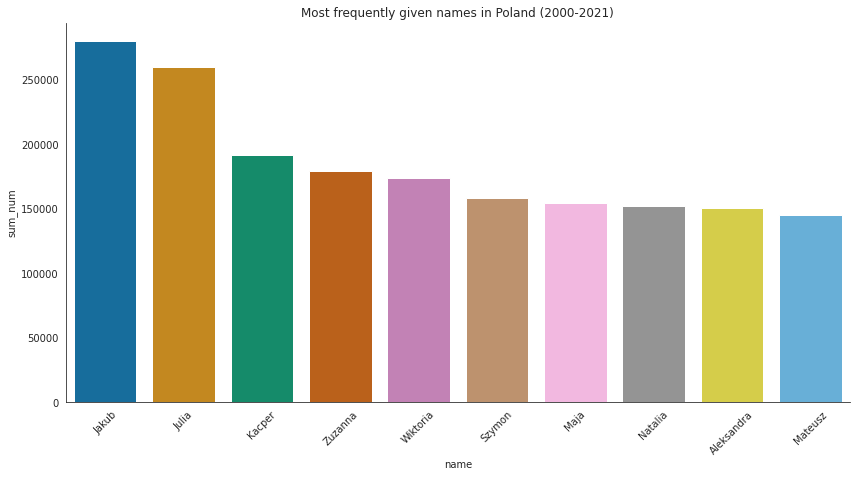

In [ ]:
#create a bar plot
title_top_10 = "Most frequently given names in Poland (2000-2021)"
sns.set_style("white")
sns.catplot(data = top_10, x = 'name', y = 'sum_num', kind = 'bar', height=6, aspect=16/8, palette = 'colorblind').set(title = title_top_10)
plt.xticks(rotation = 45) #rotate x labels by 45 degrees
plt.show()


RISE AND FALL OF JAKUB AND JULIA

We can see that two names dominate the scene: Jakub and Julia (with more than 250k occurences).

In [ ]:
#choose only data for name 'Jakub'
data_jakub = names_2000_2021.loc[names_2000_2021['name'] == 'JAKUB'] 
#choose only data for name 'Julia'
data_julia = names_2000_2021.loc[names_2000_2021['name'] == 'JULIA'] 

ValueError: min() arg is an empty sequence

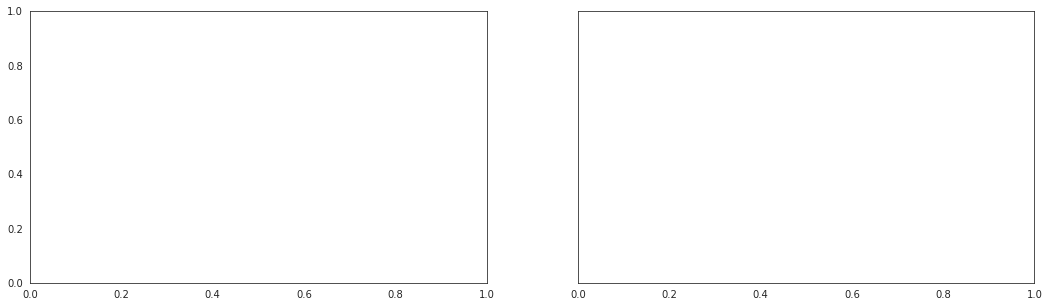

In [ ]:
#create function for subplot creation
def subplot_func(data1, x1, y1, title1, data2, x2, y2, title2, color):
    '''creates 2 pointplots with common y axis
    takes following as parameters: data1, x1, y1, title1, data2, x2, y2, title2, color'''
    #create 2 axes objects
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (18,5), sharey = True) #two subplots with shared y axis
    sns.pointplot(data = data1, x = x1, y = y1, ci = None, ax = ax0, color = color) #create pointplot data1
    ax0.set(title = title1)
    ax0.tick_params('x', labelrotation = 90)
    sns.pointplot(data = data2, x = x2, y = y2, ci = None, ax = ax1, color = color) #pointplot data2
    ax1.set(title = title2, ylabel = None)
    ax1.tick_params('x', labelrotation = 90)
    sns.set_style('whitegrid') #set style of plots
    plt.show()

#run subplot_func to create graph for JAKUB and JULIA
subplot_func(data_jakub, 'year', 'num', 'JAKUB', data_julia, 'year', 'num', 'JULIA', color = 'blue')

We can see that both Jakub and Julia were already very popular in year 2000. Their popularity peaked in 2001 and 2008 respectively. After that a decreasing trend can be observed.
Can this decrease be accounted only to popularity drop?
Or maybe fewer children have been born in recent years?
To answer this we need to calculate total number of names given per year.

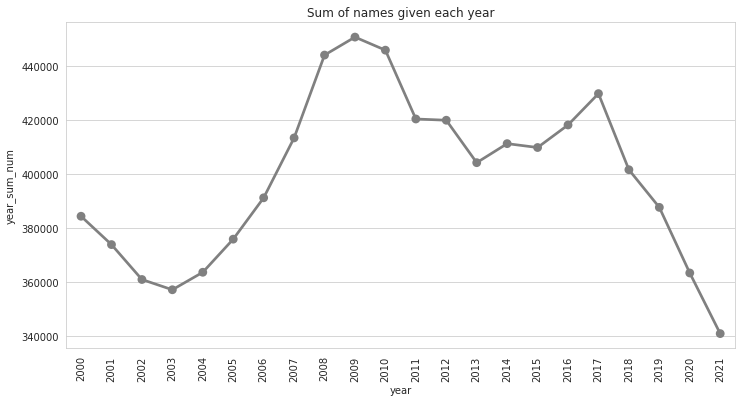

In [ ]:
#create 'year_sum_num' column: sum of names given each year.
names_2000_2021['year_sum_num'] = names_2000_2021.groupby('year')['num'].transform('sum')
#create a subset 'year_total'
year_total = names_2000_2021[['year', 'year_sum_num']].drop_duplicates()
#create a pointplot
plt.figure(figsize = (12,6))
sns.pointplot(data = year_total, x = 'year', y = 'year_sum_num', ci = None, color = 'grey').set(title = "Sum of names given each year") 
plt.xticks(rotation = 90)
plt.show()

It is clear now that the sum of names given each each fluctuates heavily. Value for year 2008 and 2021 differ by more than 100k!
Above graph corresponds to the graph of Julias per year. On both, peaks in 2017 can be observed.
So, it's probably not that Julia's popularity has increased again in 2017. Just more babies were born that year.

MOST STABLE AND LEAST STABLE

To understand which names are the most stable and which are the least, we need to calculate, for each name, ratio between maximum number of occurences and minimum number of occurences.

In [ ]:
#create column: ratio of max_num to min_num 'ratio_max_min'
names_2000_2021['ratio_max_min'] = names_2000_2021['max_num'] / names_2000_2021['min_num']

In [ ]:
#create a 'stability_subset' of data to find the most and least stable names
stability_subset = names_2000_2021[['name', 'sum_num', 'ratio_max_min']].drop_duplicates() #choose only 'name', 'sum_num' and 'ratio_max_min' from 'names_2000_2021' drop duplicates
stability_subset = stability_subset.loc[stability_subset['sum_num'] > 5000] #filter only for names that have more than 5000 occurences
most_stable = stability_subset.sort_values(by = 'ratio_max_min', ascending=True)[:10] #find 10 names with the lowest 'ratio_max_min'
print(most_stable)

         name  sum_num  ratio_max_min
55   GABRIELA    66182       1.661739
124      EMIL     9066       1.773333
73      ARTUR    20274       1.830579
112   URSZULA    10831       1.882857
38       ADAM    96397       1.934337
79       SARA    18451       1.940217
153    MARIKA     7998       2.000000
109    DOROTA     8484       2.015748
18     SZYMON   158306       2.094921
45     HUBERT    50068       2.107378


In [ ]:
least_stable = stability_subset.sort_values(by = 'ratio_max_min', ascending=False)[:10] #find 10 names with the highest 'ratio_max_min'
print(least_stable)

          name  sum_num  ratio_max_min
1584       MIA     6809     229.000000
320       LEON    37389     165.500000
299      TYMON    32062     114.054054
368       NELA    12630     109.250000
187       LENA   118439      98.885246
61    ANGELIKA    12062      82.600000
194     AMELIA   113463      69.356522
271    LILIANA    32926      66.716981
363   LILIANNA    11512      64.304348
222     IGNACY    30870      56.779221


We can see that GARBIELA and EMIL lead the way in the most stable names. On the other hand, the least stable are MIA and LEON.
Let's put them on a graph together.

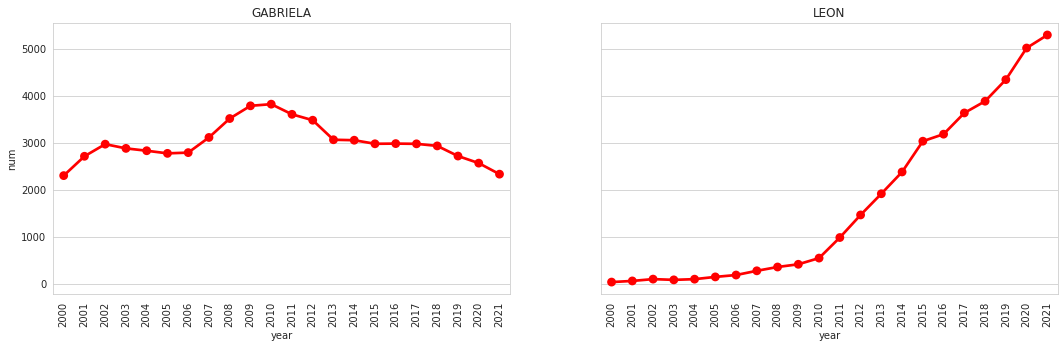

In [ ]:
#choose only data for name 'GARBIELA'
data_gabriela = names_2000_2021.loc[names_2000_2021['name'] == 'GABRIELA']
#choose only data for name 'LEON'
data_leon = names_2000_2021.loc[names_2000_2021['name'] == 'LEON']
#create a subplot
subplot_func(data_gabriela, 'year', 'num', 'GABRIELA', data_leon, 'year', 'num', 'LEON', color = 'red')

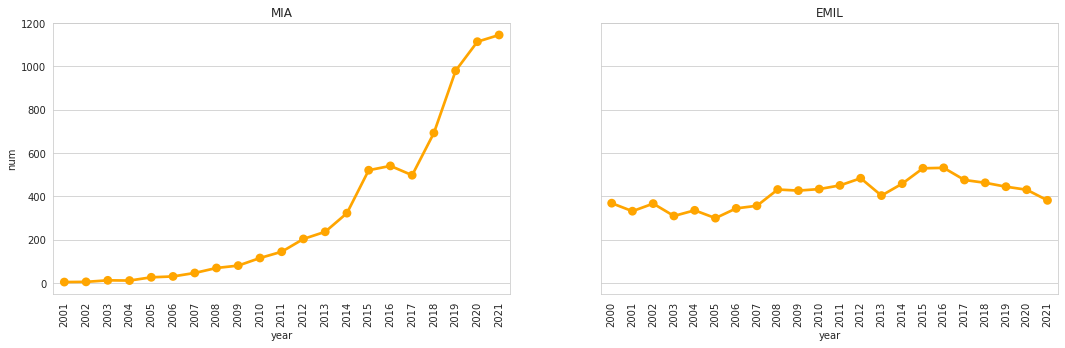

In [ ]:
#choose only data for name 'MIA'
data_mia = names_2000_2021.loc[names_2000_2021['name'] == 'MIA']
#choose only data for name 'EMIL'
data_emil = names_2000_2021.loc[names_2000_2021['name'] == 'EMIL']
#create a subplot
subplot_func(data_mia, 'year', 'num', 'MIA', data_emil, 'year', 'num', 'EMIL', color = 'orange')